## Capstone_unsupervised_learning

In [ ]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

data = pd.read_csv('creditcard.csv')

## Objective:
* Credit Fraud Detection

## Methods:
* Dimension reduction: PCA, TSNE, and UMAP
* Algrithms: KMean, Hierarchical Cluster, and Gaussian Mixture Models
* Prediction measurement: Rand Index Score and Adjusted Rand Index

In [545]:
# data.info()
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data exploration

0    284315
1       492
Name: Class, dtype: int64


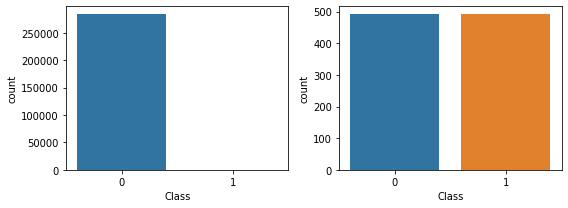

In [454]:
# sns.countplot(data['Class'])
print(data['Class'].value_counts())

df1 = data[data['Class']==1]
df2 = data[data['Class']==0].sample(n=492)
# df2 = data[data['Class']==0][0:492]
df = pd.concat([df1, df2])

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.countplot(data['Class'])

plt.subplot(1,2,2)
sns.countplot(df['Class'])

plt.tight_layout()

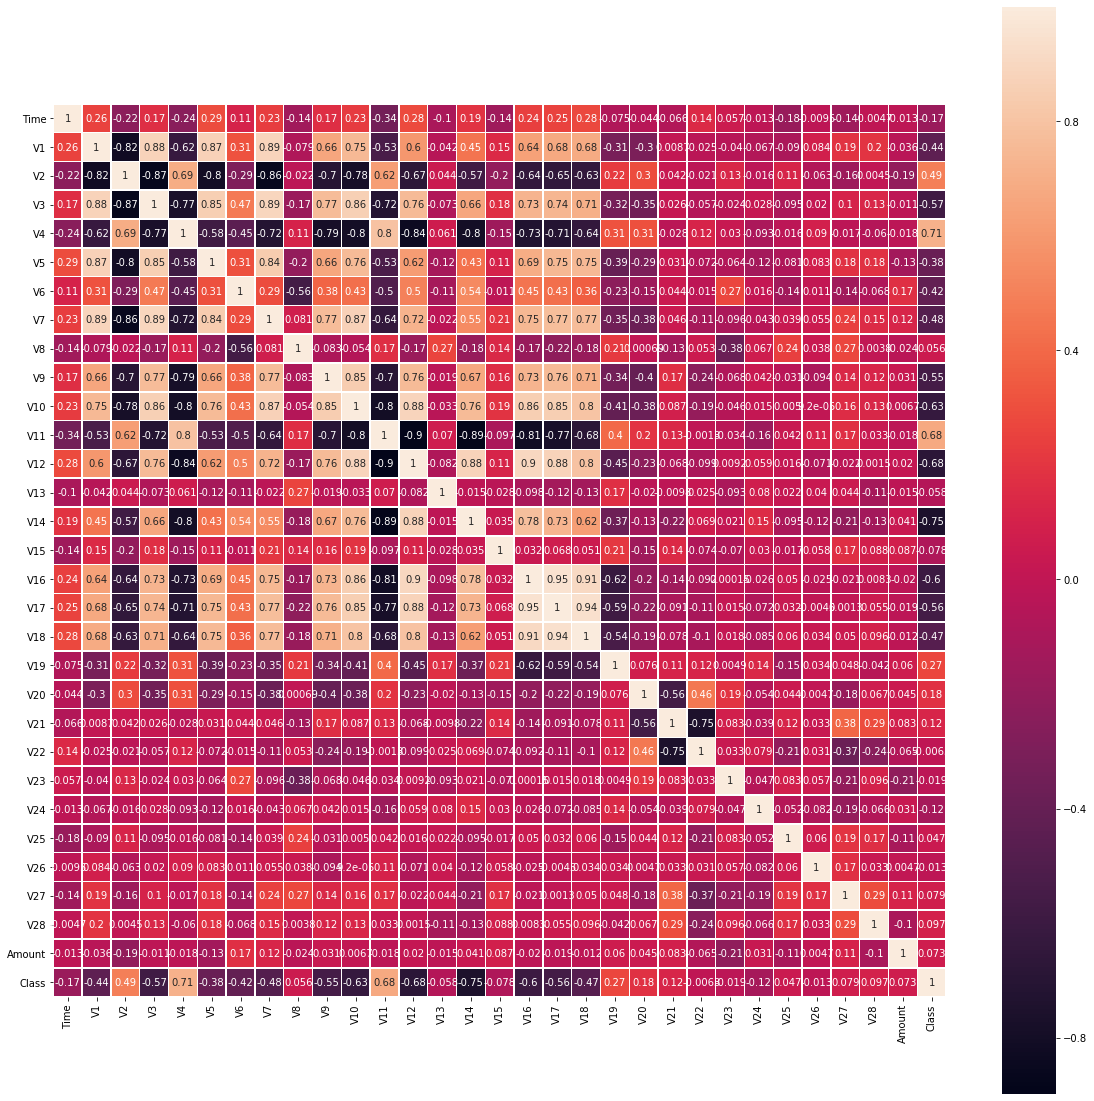

In [455]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

* There are some variables tend to correlated to each other, since we will apply dimension reduction, which will remove the any potential multicollinearity, on the data, so we will just ignore this in this step.

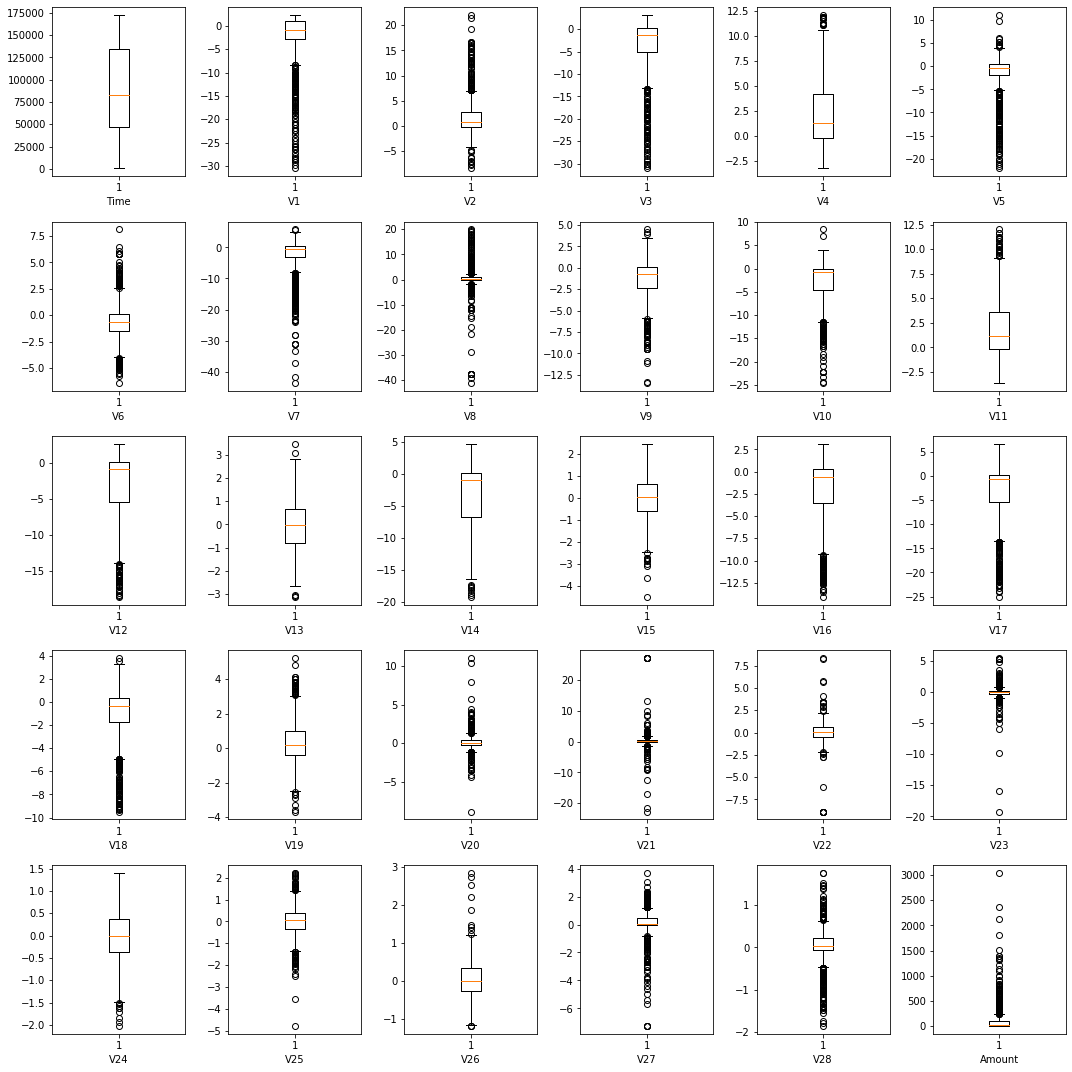

In [456]:
plt.figure(figsize=(15,15))
for i in range(0,30):
    plt.subplot(5,6,i+1)
    plt.boxplot(df[df.columns[i]])
    plt.xlabel(data.columns[i])
plt.tight_layout()

* For most of variables, they showed outlier data points which may need to be removed.

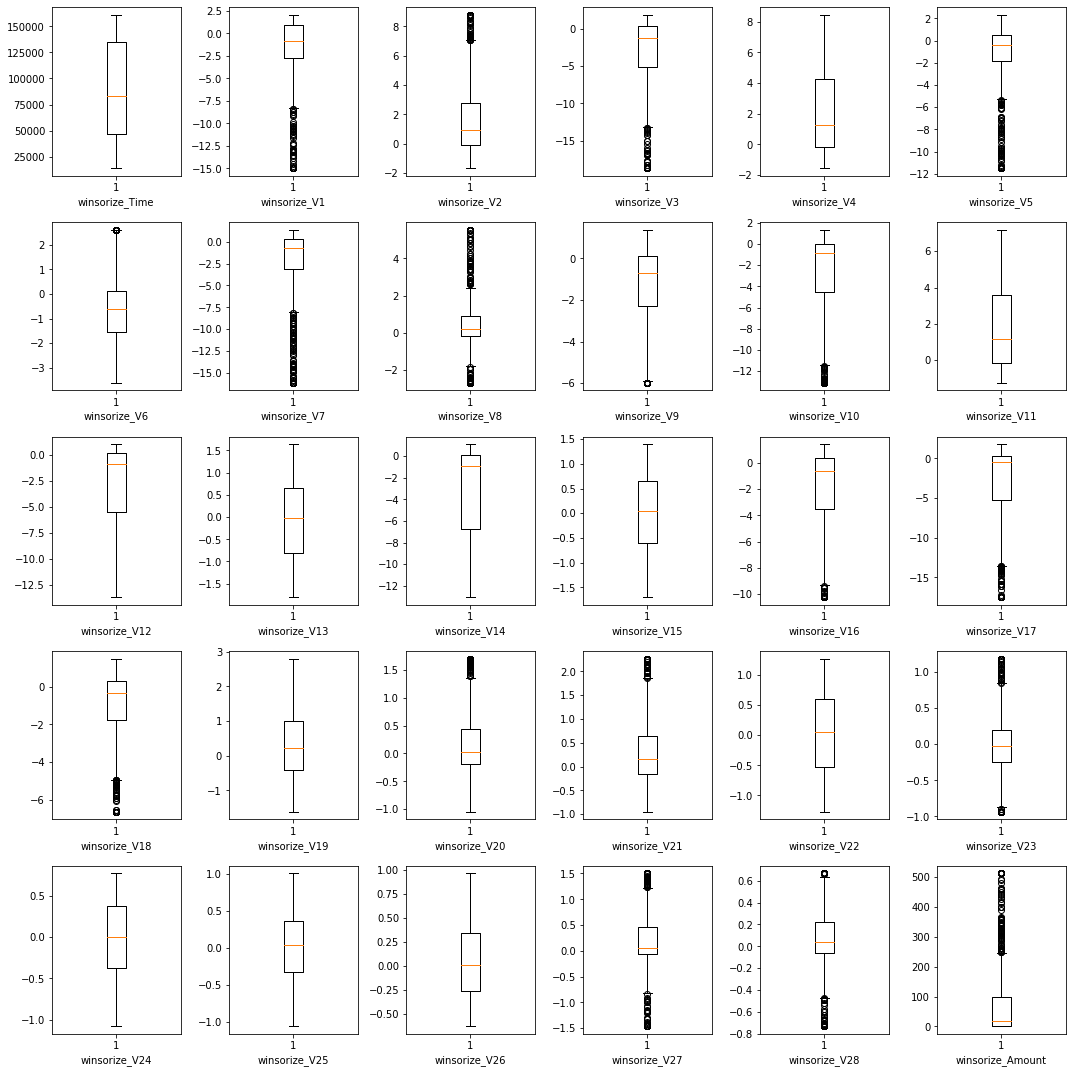

In [457]:
from scipy.stats.mstats import winsorize 
df_final = pd.DataFrame()
plt.figure(figsize=(15,15))
for i in range(0,30):
    plt.subplot(5,6,i+1)
    df_final['winsorize_{}'.format(df.columns[i])] = winsorize(df[df.columns[i]], (0.05, 0.05))
    plt.boxplot(df_final['winsorize_{}'.format(data.columns[i])])
    plt.xlabel(df_final.columns[i])
plt.tight_layout()

* After applying the winsorization which removed 5% of data points on both low and high ends and it successfully removed most of outliers now. However, still some outliers are not being removed. For the concern of lossing infomation, it should be fine for setting a lower threshold to remove only the extreme outliers. 

## Dimension reduction and Visualize data in 2D plot

#### PCA

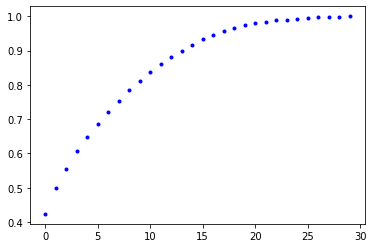

In [458]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x=df_final
y = df.Class

x = StandardScaler().fit_transform(x)
pca = PCA(n_components=30)
result = pca.fit_transform(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'b.')

* It seems 15 premary components will represent 90% of total variance, and will be used in the prediction part.

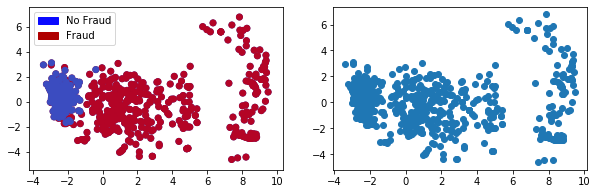

In [459]:
# plt.scatter(result[:,0],result[:,1], color =int(data['class']))
y = df.Class
y = y.reset_index()
y.drop(columns=['index'], inplace=True)

import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.scatter(result[:,0], result[:,1], c=(y.Class == 0), cmap='coolwarm')
plt.scatter(result[:,0], result[:,1], c=(y.Class == 1), cmap='coolwarm')
plt.legend(handles=[blue_patch, red_patch])

plt.subplot(1,2,2)
plt.scatter(result[:,0], result[:,1])

* As applying the PCA, the data more like to be grouped in three clusters instead of 2. Without label, we will not distinguish two separated clusters

#### TSNE

In [460]:
from sklearn.manifold import TSNE
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

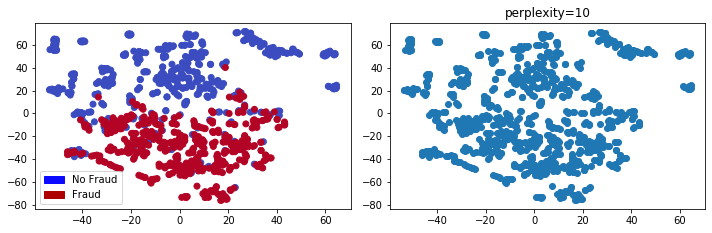

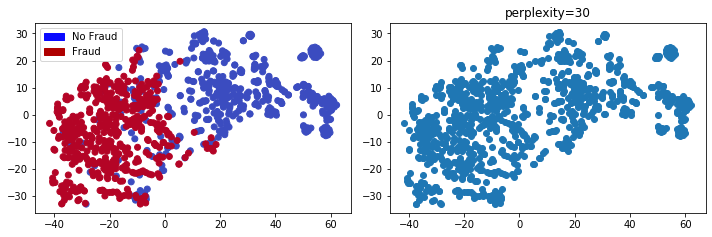

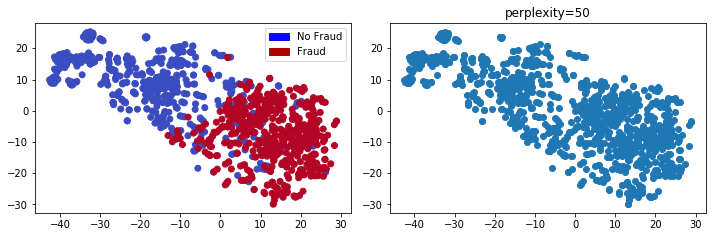

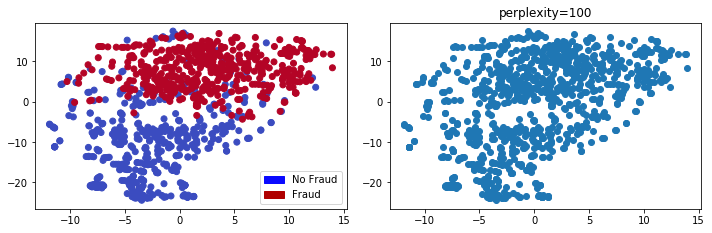

In [461]:
tsne_results = []
for i in [10,30,50,100]:
    tsne = TSNE(n_components=2, perplexity=i, random_state=42)
    tsne_results.append(tsne.fit_transform(x))
    
plt.figure(figsize=(10,12))
plt.subplot(4,2,1)
plt.scatter(tsne_results[0][:,0], tsne_results[0][:,1], c=(y.Class == 0), cmap='coolwarm')
plt.legend(handles=[blue_patch, red_patch])
plt.subplot(4,2,2)
plt.scatter(tsne_results[0][:,0], tsne_results[0][:,1])
plt.title(label='perplexity=10')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,12))
plt.subplot(4,2,3)
plt.scatter(tsne_results[1][:,0], tsne_results[1][:,1], c=(y.Class == 0), cmap='coolwarm')
plt.legend(handles=[blue_patch, red_patch])
plt.subplot(4,2,4)
plt.scatter(tsne_results[1][:,0], tsne_results[1][:,1])
plt.title(label='perplexity=30')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,12))
plt.subplot(4,2,5)
plt.scatter(tsne_results[2][:,0], tsne_results[2][:,1], c=(y.Class == 0), cmap='coolwarm')
plt.legend(handles=[blue_patch, red_patch])
plt.subplot(4,2,6)
plt.scatter(tsne_results[2][:,0], tsne_results[2][:,1])
plt.title(label='perplexity=50')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,12))
plt.subplot(4,2,7)
plt.scatter(tsne_results[3][:,0], tsne_results[3][:,1], c=(y.Class == 0), cmap='coolwarm')
plt.legend(handles=[blue_patch, red_patch])
plt.subplot(4,2,8)
plt.scatter(tsne_results[3][:,0], tsne_results[3][:,1])
plt.title(label='perplexity=100')
plt.tight_layout()
plt.show()

* Overall, TSNE showed more clearly clusters than PCA, however it still hard to identify two different clusters. And there is no significant differences as using different perplexity.

#### UMAP

In [462]:
import umap

umap_results1 = umap.UMAP(n_neighbors=10,min_dist=0.1,metric='correlation').fit_transform(x)
umap_results2 = umap.UMAP(n_neighbors=30,min_dist=0.1,metric='correlation').fit_transform(x)
umap_results3 = umap.UMAP(n_neighbors=100,min_dist=0.1,metric='correlation').fit_transform(x)

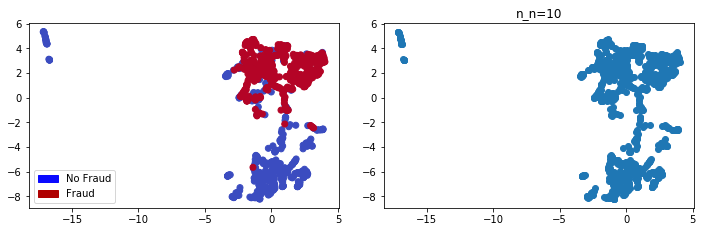

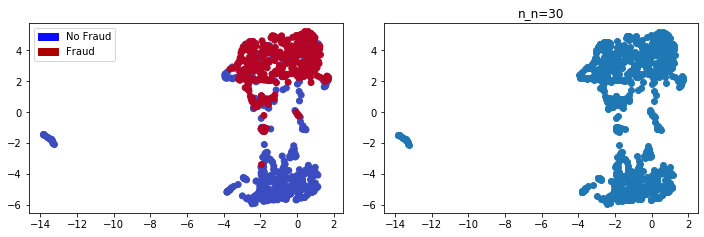

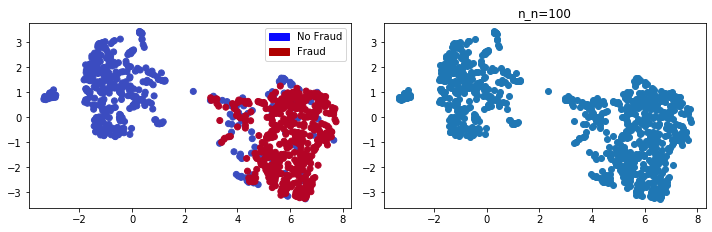

In [463]:
plt.figure(figsize=(10,9))
plt.subplot(3,2,1)
plt.scatter(umap_results1[:,0], umap_results1[:,1], c=(y.Class == 0), cmap='coolwarm')
plt.legend(handles=[blue_patch, red_patch])
plt.subplot(3,2,2)
plt.scatter(umap_results1[:,0], umap_results1[:,1])
plt.title(label='n_n=10')
plt.tight_layout()

plt.figure(figsize=(10,9))
plt.subplot(3,2,3)
plt.scatter(umap_results2[:,0], umap_results2[:,1], c=(y.Class == 0), cmap='coolwarm')
plt.legend(handles=[blue_patch, red_patch])
plt.subplot(3,2,4)
plt.scatter(umap_results2[:,0], umap_results2[:,1])
plt.title(label='n_n=30')
plt.tight_layout()

plt.figure(figsize=(10,9))
plt.subplot(3,2,5)
plt.scatter(umap_results3[:,0], umap_results3[:,1], c=(y.Class == 0), cmap='coolwarm')
plt.legend(handles=[blue_patch, red_patch])
plt.subplot(3,2,6)
plt.scatter(umap_results3[:,0], umap_results3[:,1])
plt.title(label='n_n=100')
plt.tight_layout()

* UMAP is clearly a better dimension reduction method for this data set and showed clearly separated clusters. both n_neighbours 50 and 100 work well in this case.

## Predicting and evaluating clusters using KMeans, Hierarchical clustering and Gaussian Mixture models

#### KMeans - PCA

In [472]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

pca = PCA(n_components=15)
pca_result = pca.fit_transform(x)

kmean = KMeans(n_clusters=2, random_state=123)
kmean.fit(pca_result)
y_pred_pca = kmean.predict(pca_result)

In [484]:
from sklearn import datasets, metrics
y = df.Class

y_pred_pca = np.array([0 if x == 1 else 1 for x in y_pred_pca])
print(pd.crosstab(y, y_pred_pca)) 
rand_index_score = (492+189)/984
print('rand_index_score: {}'.format(rand_index_score))
print('adjusted_rand_index: {}'.format(metrics.adjusted_rand_score(y, y_pred_pca)))

col_0    0    1
Class          
0      492    0
1      303  189
rand_index_score: 0.6920731707317073
adjusted_rand_index: 0.14702979588316176


#### KMeans - TSNE

In [474]:
kmean = KMeans(n_clusters=2, random_state=123)
kmean.fit(tsne_results[2])
y_pred_tsne = kmean.predict(tsne_results[2])

In [485]:
print(pd.crosstab(y, y_pred_tsne))

rand_index_score = (483+405)/984
print('rand_index_score: {}'.format(rand_index_score))
print('adjusted_rand_index: {}'.format(metrics.adjusted_rand_score(y, y_pred_tsne)))

col_0    0    1
Class          
0      483    9
1       87  405
rand_index_score: 0.9024390243902439
adjusted_rand_index: 0.647479069418066


#### KMeans - UMAP

In [476]:
kmean = KMeans(n_clusters=2, random_state=123)
kmean.fit(umap_results3)
y_pred_umap = kmean.predict(umap_results3)

In [486]:
print(pd.crosstab(y, y_pred_umap))

rand_index_score = (492+383)/984
print('rand_index_score: {}'.format(rand_index_score))
print('adjusted_rand_index: {}'.format(metrics.adjusted_rand_score(y, y_pred_umap)))

col_0    0    1
Class          
0      492    0
1      109  383
rand_index_score: 0.8892276422764228
adjusted_rand_index: 0.6056111127869945


#### Hierarchical - PCA

In [487]:
from sklearn.cluster import AgglomerativeClustering

In [491]:
agg_cluster = AgglomerativeClustering(linkage='complete', affinity='cosine',n_clusters=2)


In [492]:
clusters_pca = agg_cluster.fit_predict(pca_result)

In [493]:
print(pd.crosstab(y, clusters_pca))

rand_index_score = (491+294)/984
print('rand_index_score: {}'.format(rand_index_score))
print('adjusted_rand_index: {}'.format(metrics.adjusted_rand_score(y, clusters_pca)))

col_0    0    1
Class          
0      491    1
1      198  294
rand_index_score: 0.7977642276422764
adjusted_rand_index: 0.3541024179465873


#### Hierarchical - TSNE

In [495]:
clusters_tsne = agg_cluster.fit_predict(tsne_results[2])

In [497]:
print(pd.crosstab(y, clusters_tsne))

rand_index_score = (488+399)/984
print('rand_index_score: {}'.format(rand_index_score))
print('adjusted_rand_index: {}'.format(metrics.adjusted_rand_score(y, clusters_tsne)))

col_0    0    1
Class          
0      488    4
1       93  399
rand_index_score: 0.9014227642276422
adjusted_rand_index: 0.6442108441314389


#### Hierarchical - UMAP

In [504]:
clusters_umap = agg_cluster.fit_predict(umap_results3)

In [505]:
clusters_umap = np.array([0 if x == 1 else 1 for x in clusters_umap])
print(pd.crosstab(y, clusters_umap))
rand_index_score = (492+334)/984
print('rand_index_score: {}'.format(rand_index_score))
print('adjusted_rand_index: {}'.format(metrics.adjusted_rand_score(y, clusters_umap)))

col_0    0    1
Class          
0      492    0
1      158  334
rand_index_score: 0.8394308943089431
adjusted_rand_index: 0.4603609717996008


#### Guassian - PCA

In [506]:
from sklearn.mixture import GaussianMixture

gmm_cluster = GaussianMixture(n_components=2, random_state=123)

In [510]:
gmm_pca = gmm_cluster.fit_predict(pca_result) 

In [512]:
print(pd.crosstab(y, gmm_pca))
rand_index_score = (395+338)/984
print('rand_index_score: {}'.format(rand_index_score))
print('adjusted_rand_index: {}'.format(metrics.adjusted_rand_score(y, gmm_pca)))

col_0    0    1
Class          
0      395   97
1      154  338
rand_index_score: 0.7449186991869918
adjusted_rand_index: 0.2391770846822716


#### Guassian - TSNE

In [516]:
gmm_tsne = gmm_cluster.fit_predict(tsne_results[2]) 

In [518]:
print(pd.crosstab(y, gmm_tsne))
rand_index_score = (487+403)/984
print('rand_index_score: {}'.format(rand_index_score))
print('adjusted_rand_index: {}'.format(metrics.adjusted_rand_score(y, gmm_tsne)))

col_0    0    1
Class          
0      487    5
1       89  403
rand_index_score: 0.9044715447154471
adjusted_rand_index: 0.6540472449604798


#### Guassian - UMAP

In [523]:
gmm_umap = gmm_cluster.fit_predict(umap_results3) 

In [524]:
print(pd.crosstab(y, gmm_umap))
rand_index_score = (492+383)/984
print('rand_index_score: {}'.format(rand_index_score))
print('adjusted_rand_index: {}'.format(metrics.adjusted_rand_score(y, gmm_umap)))

col_0    0    1
Class          
0      492    0
1      109  383
rand_index_score: 0.8892276422764228
adjusted_rand_index: 0.6056111127869945


## Comparison between different algrithms using different dimension reduction methods

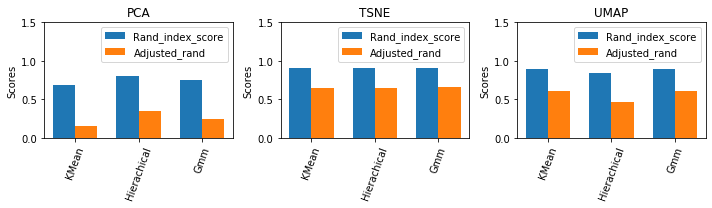

In [542]:
pca_r = [0.692,0.798,0.745]
pca_a = [0.147,0.354,0.239]
tsne_r = [0.902,0.901,0.904]
tsne_a = [0.647,0.644,0.654]
umap_r = [0.889,0.839,0.889]
umap_a = [0.606,0.460,0.606]

labels = ['KMean', 'Hierachical', 'Gmm']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1, 3,  figsize=(10, 3))

ax[0].bar(x - width/2, pca_r, width, label='Rand_index_score')
ax[0].bar(x + width/2, pca_a, width, label='Adjusted_rand')
ax[0].set_ylabel('Scores')
ax[0].set_title('PCA')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels, rotation=70)
ax[0].set_ylim(0,1.5)
ax[0].legend()

ax[1].bar(x - width/2, tsne_r, width, label='Rand_index_score')
ax[1].bar(x + width/2, tsne_a, width, label='Adjusted_rand')
ax[1].set_ylabel('Scores')
ax[1].set_title('TSNE')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels, rotation=70)
ax[1].set_ylim(0,1.5)
ax[1].legend()

ax[2].bar(x - width/2, umap_r, width, label='Rand_index_score')
ax[2].bar(x + width/2, umap_a, width, label='Adjusted_rand')
ax[2].set_ylabel('Scores')
ax[2].set_title('UMAP')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels, rotation=70)
ax[2].set_ylim(0,1.5)
ax[2].legend()

plt.tight_layout()

* Rand_index_score indicates the accuracy of the prediction.                                        
* Adjusted_rand reflect if the prediction tend to be random or perfect. 
* Overall, applying TSNE generate the highest accuracy and confidence as using different algrithms. 
* With applying UMAP also produce a very high accuracy, but the perdiction tend to be more random than TSNE.     
* PCA showed the worst prediction for all the algrithms, that may somehow linked to the confusion cluster visualizations.

## Summary
* The imbalance dataset converted into a balance dataset using .sample()
* Outlier data points have beed removed by applying winsorization with a threshold 0.05
* Three dimension reduction methods have been explored and data vasulized in 2D plot. Umap showed the most clearly separated clusters. TSNE also resolved two clusters, but it is hard to detect when there is no labels. PCA did not resolve very well in this case. 
* From the cumulative explained_variance_ratio plot, it is seen that with about 15 premary components which could represent 90% of the total variance.
* Ingeneral, TSNE is more suitable for this project since all the algrithms showed higher accuracy and confidence. Umap also showed very good accuracy, but the prediction tend to be more random.
* Three algrithms were tested and there is no clear advantages interms of accuracy and confidence level between different algrithms. However, using Hierachical with applying TSNE produce the highest accuracy 0.904 and confidence 0.654.

## Future improvement
* 1 More data should be included into the calculation.
* Better understanding the variables, if the variable name would available. Investigate the correlations between different variables and maybe combine some of them.
* Try some other algrithms such as Neural networks.